<a href="https://colab.research.google.com/github/codeforbiology/python/blob/main/Data%20Analysis%20and%20Visualization%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Library

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('/content/drive/MyDrive/EDGEIUICT 137 Abu Reza/Biotech Data.csv')

#Basic Statistics from csv

In [12]:
print(data.head())
print(data.info())
print(data.describe())

  Stations  Longitude  Latitude Zones  Depth  Phytoplankton  Diatoms  \
0        A        126      18.0   Hot      1          54.78    42.61   
1        A        126      18.0   Hot      2          96.52    89.57   
2        A        126      18.0   Hot      3          98.26    88.70   
3        A        126      18.0   Hot      4          12.17     8.70   
4        B        128      18.0   Hot      1          40.87    20.00   

   Dinoflagilates  Cyanobacteria  Temperature  Salinity   PO4  SiO3   NH4  \
0           12.17           0.87        28.80     34.28  0.00  0.79  0.93   
1            6.96           0.00        28.77     34.31  0.00  0.89  1.03   
2            9.57           0.00        25.33     34.99  0.03  1.31  1.14   
3            3.48           0.00        22.38     35.04  0.20  1.65  0.00   
4           20.87           6.96        28.74     34.07  0.16  0.47  2.55   

    NOx   NO2   NO3  
0  0.21  0.13  0.08  
1  0.32  0.10  0.22  
2  0.94  0.21  0.74  
3  2.13  0.14  1

#Grouping and Aggreagting Data

In [18]:
avg_temp_sal = data.groupby("Zones")[["Temperature", "Salinity"]].mean()
print(avg_temp_sal)

       Temperature   Salinity
Zones                        
Cold     26.202083  34.457917
Dry      25.046000  34.304000
Hot      25.124167  34.725000
Rainy    26.450833  34.510833


#Data visualization with matplotlib and seaborn

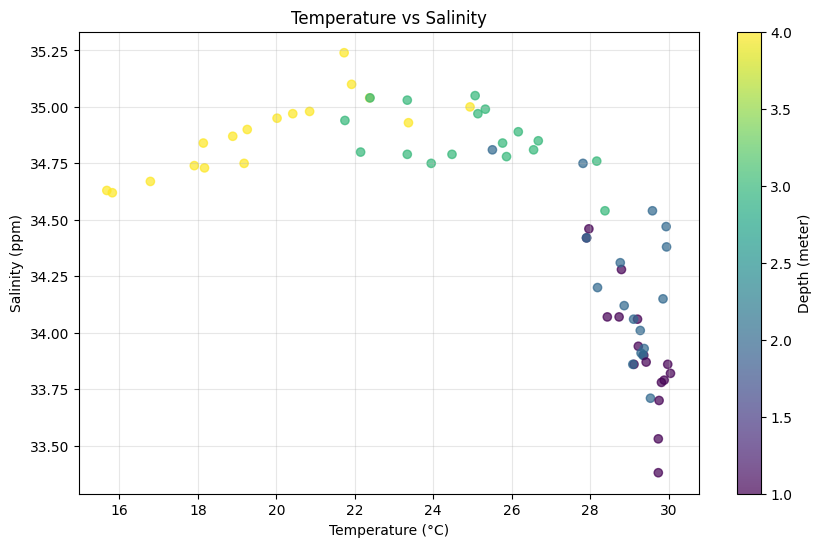

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Temperature"], data["Salinity"], c=data["Depth"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Depth (meter)")
plt.title("Temperature vs Salinity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Salinity (ppm)")
plt.grid(alpha=0.3)
plt.show()
plt.savefig("scatter.png")

#Heatmap Generation

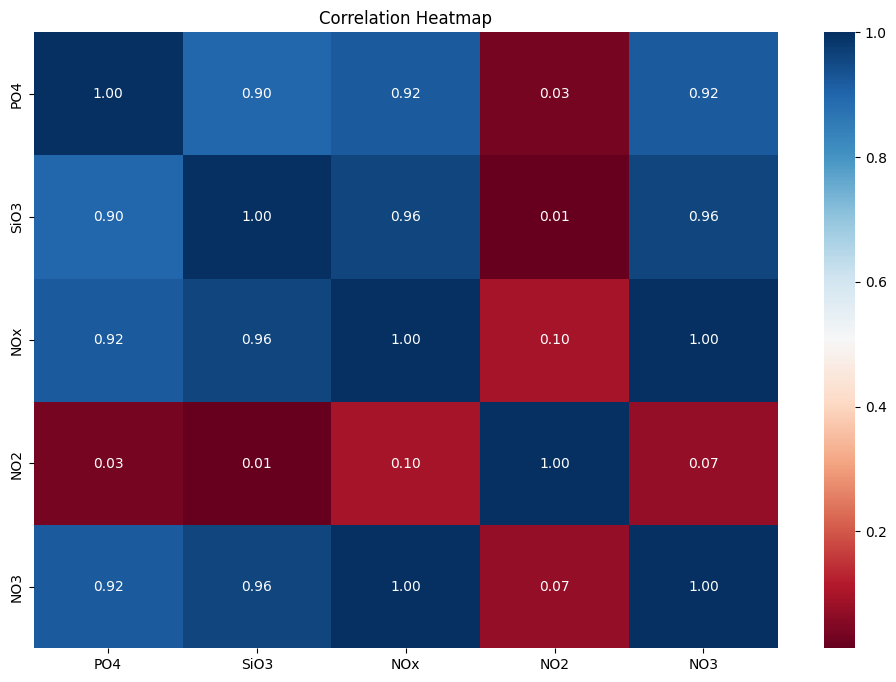

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(data[["PO4", "SiO3", "NOx", "NO2", "NO3"]].corr(), annot=True, cmap="RdBu", fmt=".2f") #color code : https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.title("Correlation Heatmap")
plt.show()
plt.savefig("temperature_vs_salinity.png")

#Bar Plot of Total Phytoplankton by Zone

<ipython-input-40-c8a86d9cacd7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zones', y='Phytoplankton', data=zone_phytoplankton, palette='coolwarm')


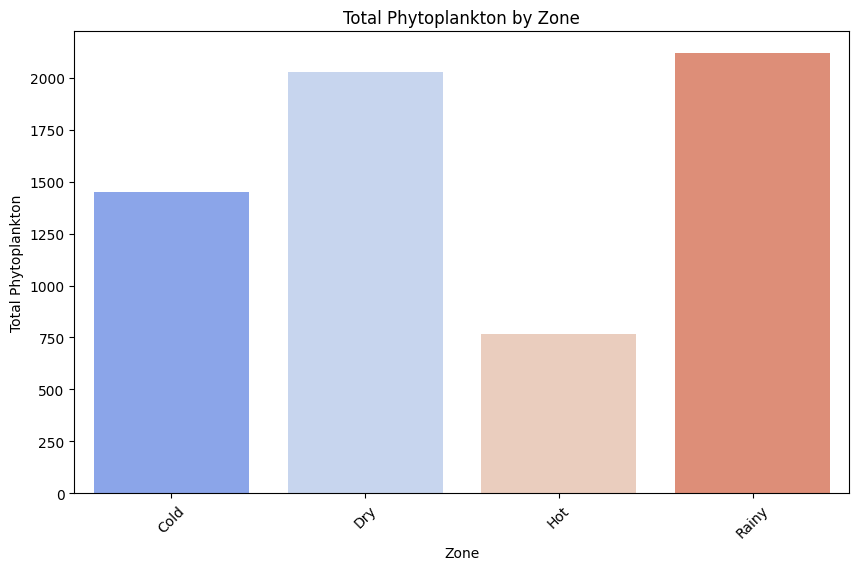

<Figure size 640x480 with 0 Axes>

In [40]:
zone_phytoplankton = data.groupby('Zones')['Phytoplankton'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Zones', y='Phytoplankton', data=zone_phytoplankton, palette='coolwarm')
plt.title('Total Phytoplankton by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Phytoplankton')
plt.xticks(rotation=45)
plt.show()
plt.savefig("temperature_vs_salinity.png")
#

#Ploting map

In [41]:
import folium

# Create a base map centered at the average latitude and longitude
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
base_map = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for i, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Station: {row['Stations']}, Zone: {row['Zones']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(base_map)

# Save the map to an HTML file and display it
base_map

In [42]:
# prompt: exporting map

base_map.save("map.html")
